In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import numpy as np

### Methodology 

UPDATED UPDATED UPDATED Methodology

After discussion with the PBB team, we decided it will make for a stronger pitch if we don't project PBB cost based on a projected adoption rate, but rather show how many households we can connect if we use ALL available High Cost Funds every year. I'll also show an analogous adoption rate for each HH estimate, assuming 19.3M eligible and 6.85% receiving the $75 benefit.

### Bar Graph

In [2]:
##Data on projected High Cost Budget through 2038
#Note the High Cost Fund data was copied and pasted from the Data for PBB spreadsheet

df = pd.DataFrame(columns = ['year','committed_high_cost', 'potential_pbb'])

df['year'] = [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
             2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]

# Committed Funds and Potential for Reallocation data
df['committed_high_cost'] = [4629464191,
3655016800,
3655016800,
2952943021,
2952943021,
2809858317,
2809858317,
2170712311,
2170712311,
2170712311,
2170712311,
2170712311,
2170712311,
2170712311,
2170712311,
911410403,
911410403]

df['potential_pbb'] = [0,
974447391,
974447391,
1676521171,
1676521171,
1819605875,
1819605875,
2458751880,
2458751880,
2458751880,
2458751880,
2458751880,
2458751880,
2458751880,
2458751880,
3718053788,
3718053788]

df.head()

,year,committed_high_cost,potential_pbb
0,2024,4629464191,0
1,2025,3655016800,974447391
2,2026,3655016800,974447391
3,2027,2952943021,1676521171
4,2028,2952943021,1676521171


In [3]:
##households served
#This is assuming 6.85% receive $75 per month and the remaining 93.15% receive $30. 
#Annual estimate, so they will receive that 12 times per year
yearly_cost_hh = (1.02*12*(75*0.0685+30*0.9315))
df['households'] = df['potential_pbb']/yearly_cost_hh

df['adoption_rate'] = df['households']/19323551
df

,year,committed_high_cost,potential_pbb,households,adoption_rate
0,2024,4629464191,0,0.000000e+00,0.000000
1,2025,3655016800,974447391,2.406460e+06,0.124535
2,2026,3655016800,974447391,2.406460e+06,0.124535
3,2027,2952943021,1676521171,4.140276e+06,0.214261
4,2028,2952943021,1676521171,4.140276e+06,0.214261
5,2029,2809858317,1819605875,4.493633e+06,0.232547
6,2030,2809858317,1819605875,4.493633e+06,0.232547
7,2031,2170712311,2458751880,6.072045e+06,0.314230
8,2032,2170712311,2458751880,6.072045e+06,0.314230
9,2033,2170712311,2458751880,6.072045e+06,0.314230


In [4]:
#Just exporting to update the Data for PBB sheet. You can skip this if re-running
df.to_csv('/Users/mhamburger94/ESH/Projects/PBB/pbb_households.csv', index=False)

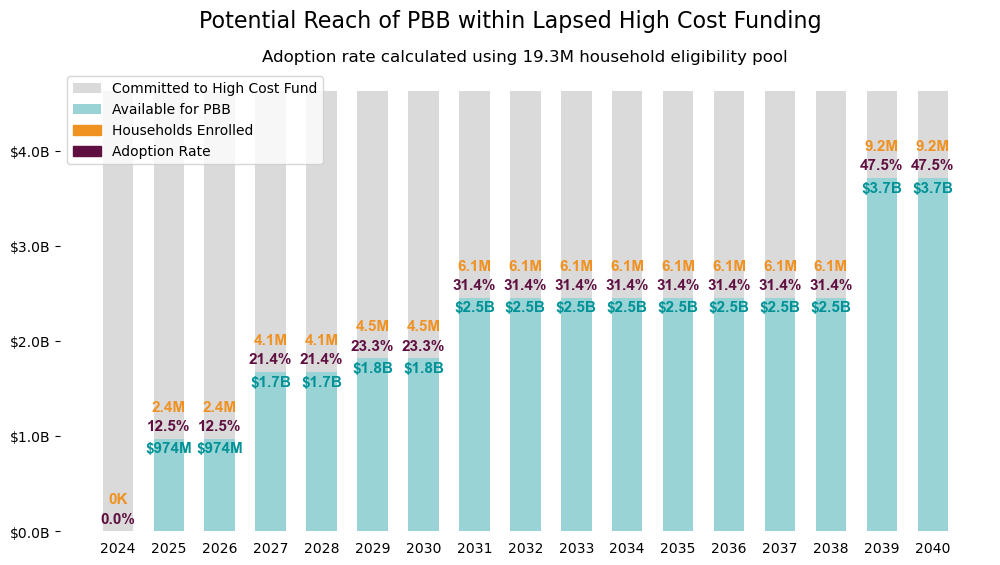

In [4]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked bar chart
bar_width = 0.6
bars1 = plt.bar(df['year'], df['potential_pbb'] , color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars2 = plt.bar(df['year'], df['committed_high_cost'], bottom=df['potential_pbb'], color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

years = df['year']
pbb = df['potential_pbb']
pbbp = pbb[1:]
ar = df['adoption_rate']
hh = df['households']

# Add data labels

for i, txt in enumerate(pbbp):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i]+1, pbb[i+1]), textcoords="offset points", xytext=(0,-10), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#009296')

for i, txt in enumerate(hh):
    if not np.isnan(txt):
        label2 = f"{txt/1e6:.1f}M" if txt >= 1e6 else f"{txt/1e3:.0f}K"
        ax1.annotate(label2, (years[i], pbb[i]), textcoords="offset points", xytext=(0,20), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F09221')

for i, txt in enumerate(ar):
    if not np.isnan(txt):
        label3 = f'{txt*100:.1f}%'
        ax1.annotate(label3, (years[i], pbb[i]), textcoords="offset points", xytext=(0,6), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')        
# Axis Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('Potential Reach of PBB within Lapsed High Cost Funding', size=16)
plt.title('Adoption rate calculated using 19.3M household eligibility pool', size=12)


#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)


#Legend
import matplotlib.patches as mpatches
# Create custom legend entries
households_patch = mpatches.Patch(color='#F09221', label='Households Enrolled')
adoption_patch = mpatches.Patch(color='#5F0F40', label='Adoption Rate')


plt.legend(handles=[bars2, bars1, households_patch, adoption_patch], loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)


# Display the plot
plt.show()

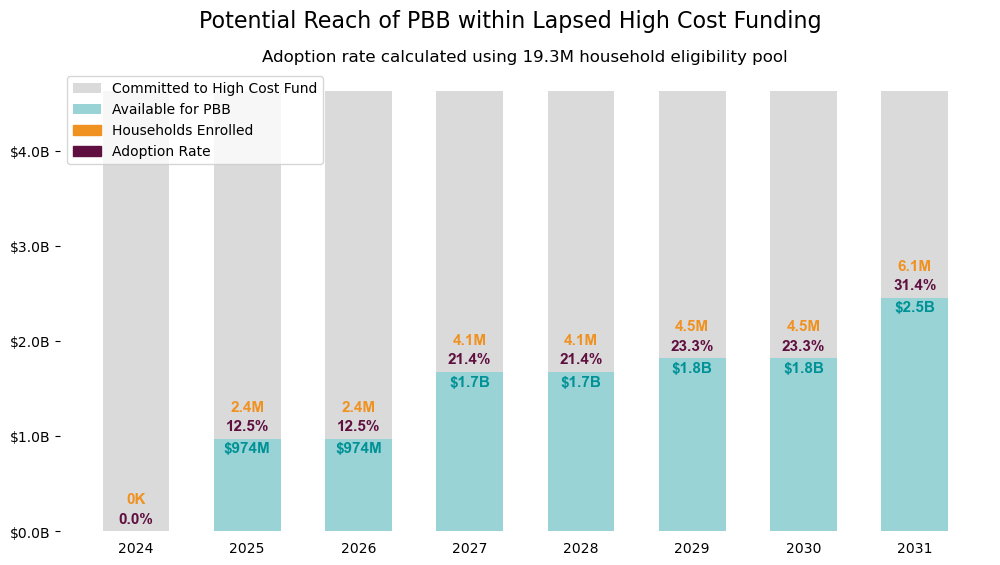

In [5]:
# Plotting, but only through 2031
dfs = df.head(8)

fig, ax1 = plt.subplots(figsize=(12, 6))


# Stacked bar chart
bar_width = 0.6
bars11 = plt.bar(dfs['year'], dfs['potential_pbb'] , color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars22 = plt.bar(dfs['year'], dfs['committed_high_cost'], bottom=dfs['potential_pbb'], color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

yearss = dfs['year']
pbbs = dfs['potential_pbb']
pbbps = pbbs[1:]
ars = dfs['adoption_rate']
hhs = dfs['households']

# Add data labels

for i, txt in enumerate(pbbps):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (yearss[i]+1, pbbs[i+1]), textcoords="offset points", xytext=(0,-10), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#009296')

for i, txt in enumerate(hhs):
    if not np.isnan(txt):
        label2 = f"{txt/1e6:.1f}M" if txt >= 1e6 else f"{txt/1e3:.0f}K"
        ax1.annotate(label2, (yearss[i], pbbs[i]), textcoords="offset points", xytext=(0,20), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F09221')

for i, txt in enumerate(ars):
    if not np.isnan(txt):
        label3 = f'{txt*100:.1f}%'
        ax1.annotate(label3, (yearss[i], pbbs[i]), textcoords="offset points", xytext=(0,6), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')        
# Axis Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('Potential Reach of PBB within Lapsed High Cost Funding', size=16)
plt.title('Adoption rate calculated using 19.3M household eligibility pool', size=12)


#label years, but remove tick marks.
plt.xticks(yearss)
ax1.tick_params(axis='both', which='both', bottom=False)


#Legend
import matplotlib.patches as mpatches
# Create custom legend entries
households_patch = mpatches.Patch(color='#F09221', label='Households Enrolled')
adoption_patch = mpatches.Patch(color='#5F0F40', label='Adoption Rate')


plt.legend(handles=[bars22, bars11, households_patch, adoption_patch], loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)


# Display the plot
plt.show()

# Outreach And Awareness

The outreach and awareness fund will be funded by ISP's paying a $100 finder's fee for every new customer they get through the Portal. 16.3M out of the 19.3M are previously unconnected, so 84\% of PBB recipients will be new customers. High Cost Locations will be exempt from this fee, so 93\% of providers will pay into it. 

Additionally, ISPs only have to pay into the fund for every customer that comes through the Portal. It is hard to predict what percent of customers that will be because there is not much precedent for the Portal and the customers being targeted are particularly hard to reach. We use 60\% as conservative estimate.

In [5]:
#increase in households is the new enrollees year to year
df['increase_hh'] = df['households'].diff().fillna(0)

#Outreach and Awareness fund is the new enrollees times all relevant percentages time $100
pct_unc = 16323551/19323551
pct_pay = 0.9315
pct_portal = 0.6
fee = 100

df['oa_fund_nofit'] = df['increase_hh']*pct_unc*pct_pay*pct_portal*fee

#market opportunity for comparsion
#df['market_opp'] = df['households']*12*30

df.head()

,year,committed_high_cost,potential_pbb,households,adoption_rate,increase_hh,oa_fund_nofit
0,2024,4629464191,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,2025,3655016800,974447391,2.406460e+06,0.124535,2.406460e+06,1.136163e+08
2,2026,3655016800,974447391,2.406460e+06,0.124535,0.000000e+00,0.000000e+00
3,2027,2952943021,1676521171,4.140276e+06,0.214261,1.733816e+06,8.185870e+07
4,2028,2952943021,1676521171,4.140276e+06,0.214261,0.000000e+00,0.000000e+00


From here, there are two main questions to answer: 
1. How much money will the Outreach and Awareness fund take in each year?
2. How much money will the Outreach and Awareness fund take in on average?

UPDATE 10/4: The graph we need will follow a logistic curve pattern, but with an exception. The logistic regression projects 1.8M households enrolled in the first year (2024), even though the data point fit is 0 households in 2024. In previous iterations, I had simply dropped those 1.8M households and considered the new households enrolled each year after that. 

However, Evan pointed out that this means the model ignores funds brought in from a large group of enrolled households (~$84M). So this iteration of the model will redistribute those new households into other years. 

# O&A Curve 3: Fit using Logarithmic Curve 

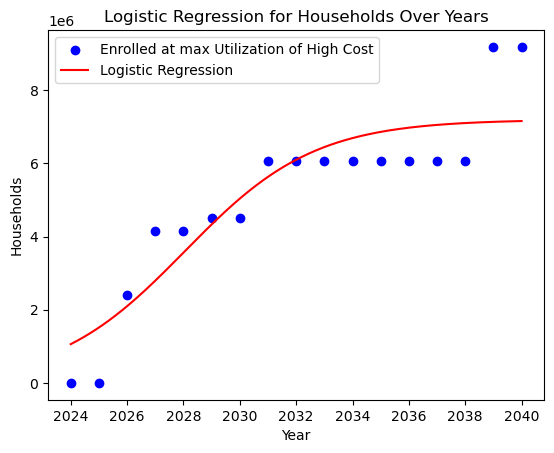

In [6]:
df.loc[1, 'households'] = 0
## set up logistic curve
def logistic_function(x, L, k, x_0):
    return L / (1 + np.exp(-k * (x - x_0)))


# Extract years (x) and households (y) from the DataFrame
x = df['year'].values
y = df['households'].values

# Initial guess for the parameters [L, k, x0] for curve fitting
initial_guess = [max(y), 1, np.median(x)]

# Perform logistic regression (curve fitting)
params, _ = curve_fit(logistic_function, x, y, p0=initial_guess)

# Extract the fitted parameters
L, k, x0 = params

# Generate predicted household values using the fitted logistic function
df['Logistic_Households'] = logistic_function(df['year'], L, k, x0)

# Plot the original data points
plt.scatter(x, y, color='blue', label='Enrolled at max Utilization of High Cost')

# Plot the logistic regression curve
x_range = np.linspace(min(x), max(x), 500)
y_logistic = logistic_function(x_range, L, k, x0)
plt.plot(x_range, y_logistic, color='red', label='Logistic Regression')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Households')
plt.title('Logistic Regression for Households Over Years')
plt.legend()

# Show the plot
plt.show()

In [7]:
#create the New Households column
df['new_households'] = df['Logistic_Households'].diff().fillna(0)

#value for number of households in the logistic model that are enrolled in 2024
#calling it 'dist' because it needs to be distributed into the new households count for the next 5 years
dist = df.iloc[0,7]

#distributing dist through the next 5 years
#create a column for what proportion of dist to give to each year
df['pct_of_total'] = df['new_households'] / df['new_households'].sum()

#add the distributed new households
df['new_households'] = df['new_households'] + (df['pct_of_total']*dist)


#multiply by the Fee and Percentages (60%, 84%, 93%) to get the O&A fund size
df['oa_fund_60'] = df['new_households']*pct_unc*pct_pay*pct_portal*fee

df

,year,committed_high_cost,potential_pbb,households,adoption_rate,increase_hh,oa_fund_nofit,Logistic_Households,new_households,pct_of_total,oa_fund_60
0,2024,4629464191,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.058962e+06,0.000000,0.000000,0.000000e+00
1,2025,3655016800,974447391,0.000000e+00,0.124535,2.406460e+06,1.136163e+08,1.513372e+06,533331.268604,0.074527,2.518018e+07
2,2026,3655016800,974447391,2.406460e+06,0.124535,0.000000e+00,0.000000e+00,2.096175e+06,684023.010228,0.095584,3.229479e+07
3,2027,2952943021,1676521171,4.140276e+06,0.214261,1.733816e+06,8.185870e+07,2.793106e+06,817972.816230,0.114302,3.861897e+07
4,2028,2952943021,1676521171,4.140276e+06,0.214261,0.000000e+00,0.000000e+00,3.560008e+06,900095.752344,0.125778,4.249624e+07
5,2029,2809858317,1819605875,4.493633e+06,0.232547,3.533568e+05,1.668304e+07,4.330389e+06,904179.344922,0.126348,4.268904e+07
6,2030,2809858317,1819605875,4.493633e+06,0.232547,0.000000e+00,0.000000e+00,5.036570e+06,828828.866838,0.115819,3.913152e+07
7,2031,2170712311,2458751880,6.072045e+06,0.314230,1.578412e+06,7.452160e+07,5.631613e+06,698388.554735,0.097592,3.297304e+07
8,2032,2170712311,2458751880,6.072045e+06,0.314230,0.000000e+00,0.000000e+00,6.098443e+06,547907.907812,0.076564,2.586839e+07
9,2033,2170712311,2458751880,6.072045e+06,0.314230,0.000000e+00,0.000000e+00,6.444579e+06,406252.172965,0.056769,1.918039e+07


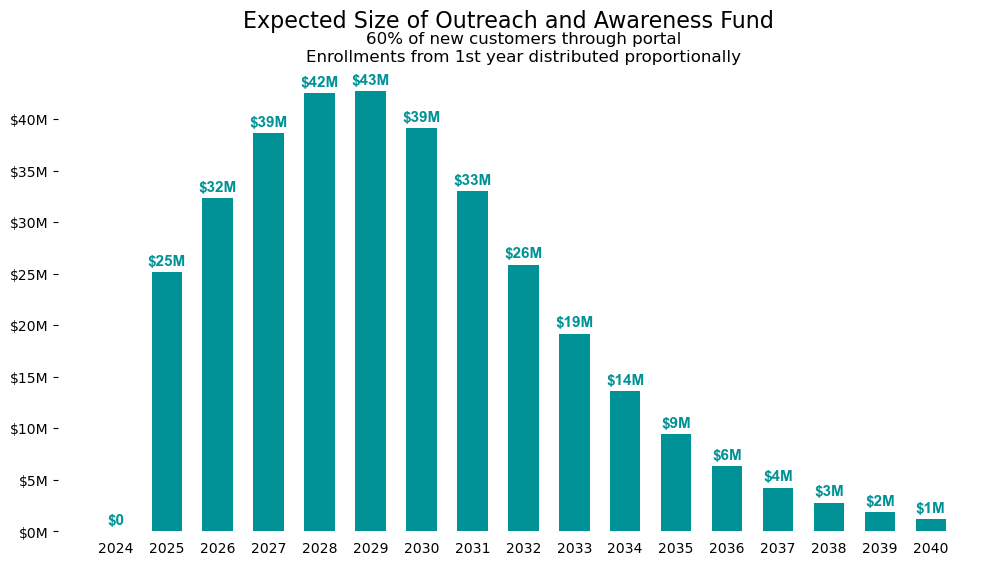

In [8]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
bwidth= 0.6

bars1 = plt.bar(df['year'], df['oa_fund_60'], color='#009296', width=bwidth, label='Outreach & Awareness Fund')


# Define a function to format the y-axis labels
def billions(txt, pos):
    # Format number in billions
    return f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

#label the bars
for i, txt in enumerate(df['oa_fund_60']):
    label = f"${txt/1e6:.0f}M" if txt >= 1e6 else f"${txt:.0f}"
    ax1.annotate(label, (df['year'][i], df['oa_fund_60'][i]),  textcoords="offset points", xytext=(0,5), 
                 ha='center', fontsize=11, weight='bold', fontname = 'Arial', color = '#009296')

plt.suptitle('Expected Size of Outreach and Awareness Fund', size=16)
plt.title('60% of new customers through portal\nEnrollments from 1st year distributed proportionally', 
          size=12)


#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)
plt.box(False)

In [10]:
#average,  including the first year
df['oa_fund_60'][1:].mean()

21116726.501284324

In [17]:
df.to_csv('/Users/mhamburger94/ESH/Projects/PBB/pbb_oafund_projections.csv', index=False)